<a href="https://colab.research.google.com/github/Faysal-152/cse499/blob/main/MS_Without_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/dataset/MS-data_version-1.csv",encoding="cp1252")
df.head()

,Undergrade University,Undergrade CGPA,Undergrade Department,TOEFL,GRE/GMAT,Conference Paper,Journal Paper,Job Experience(Years),Class
0,NSU,3.98,ENGLISH,120,0,1,0,1.0,A
1,NSU,3.98,ENGLISH,120,0,1,0,1.0,A
2,NSU,3.98,ENGLISH,120,0,1,0,1.0,A
3,NSU,3.98,ENGLISH,120,0,1,0,1.0,B
4,NSU,3.98,ENGLISH,120,0,1,0,1.0,A


In [ ]:
df.describe()

,Undergrade CGPA,TOEFL,GRE/GMAT,Conference Paper,Journal Paper,Job Experience(Years)
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,3.466008,99.045627,279.060837,1.520913,0.562738,2.143726
std,0.259922,16.149995,95.274353,2.218619,1.078440,4.645755
min,2.930000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.250000,93.000000,304.000000,0.000000,0.000000,0.000000
50%,3.490000,101.000000,310.000000,1.000000,0.000000,1.000000
75%,3.630000,108.000000,316.000000,2.000000,1.000000,2.000000
max,4.000000,120.000000,337.000000,13.000000,4.000000,45.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Undergrade University  263 non-null    object 
 1   Undergrade CGPA        263 non-null    float64
 2   Undergrade Department  263 non-null    object 
 3   TOEFL                  263 non-null    int64  
 4   GRE/GMAT               263 non-null    int64  
 5   Conference Paper       263 non-null    int64  
 6   Journal Paper          263 non-null    int64  
 7   Job Experience(Years)  263 non-null    float64
 8   Class                  263 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 18.6+ KB


In [ ]:
df.isnull().sum()

Undergrade University    0
Undergrade CGPA          0
Undergrade Department    0
TOEFL                    0
GRE/GMAT                 0
Conference Paper         0
Journal Paper            0
Job Experience(Years)    0
Class                    0
dtype: int64

Text(0, 0.5, 'Number')

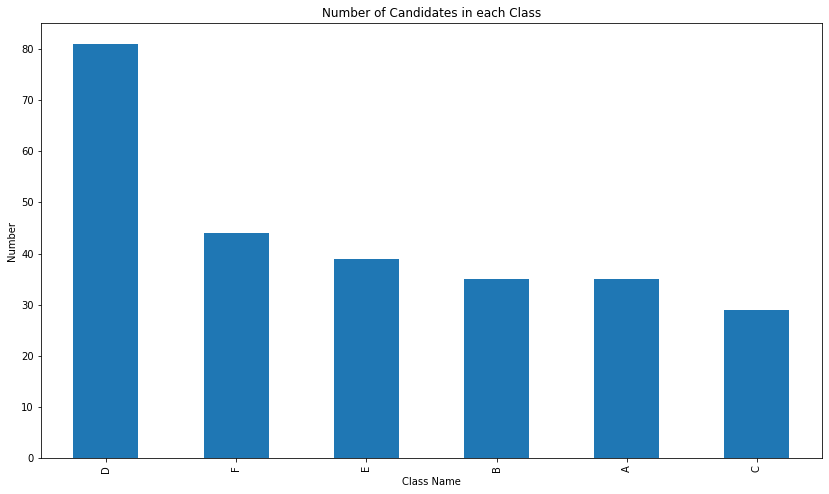

In [ ]:
ax = df['Class'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Candidates in each Class")
ax.set_xlabel("Class Name")
ax.set_ylabel("Number")

In [ ]:
df['Class'].value_counts()

D    81
F    44
E    39
B    35
A    35
C    29
Name: Class, dtype: int64

Text(0, 0.5, 'Number')

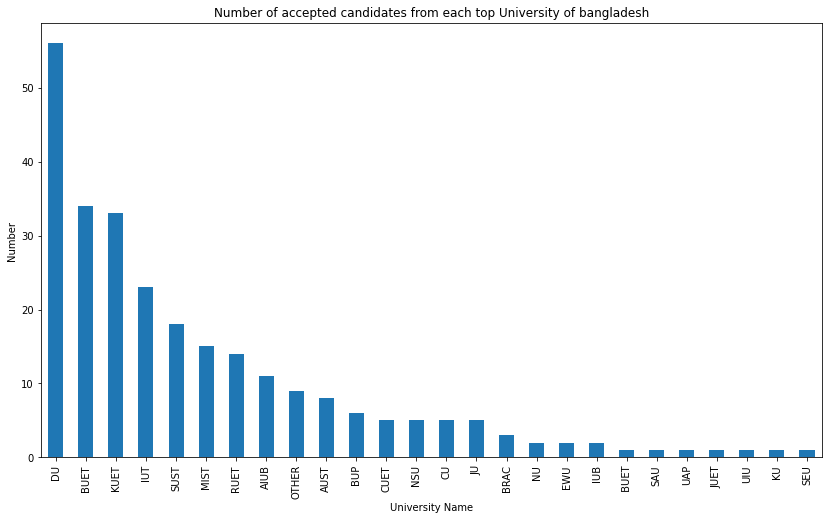

In [ ]:
ax = df['Undergrade University'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of accepted candidates from each top University of bangladesh")
ax.set_xlabel("University Name")
ax.set_ylabel("Number")

Text(0, 0.5, 'Number')

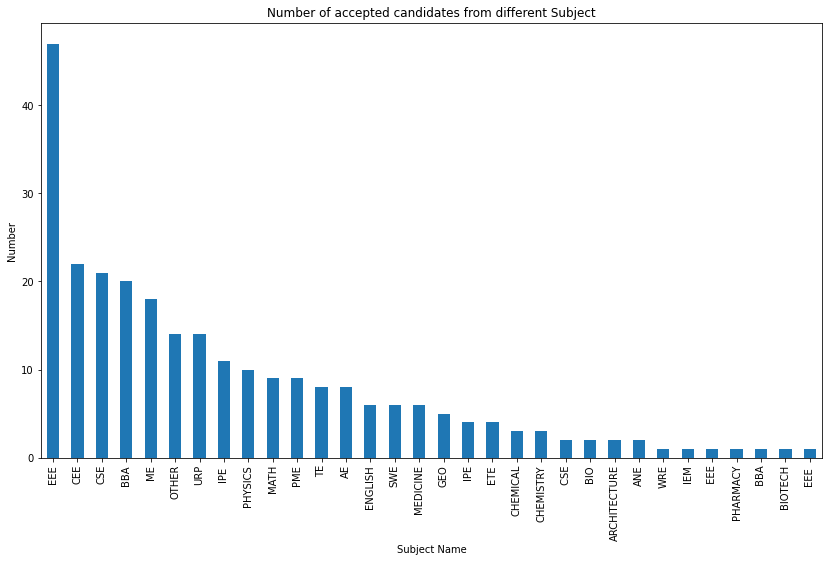

In [ ]:
ax = df['Undergrade Department'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of accepted candidates from different Subject")
ax.set_xlabel("Subject Name")
ax.set_ylabel("Number")

Relplotting

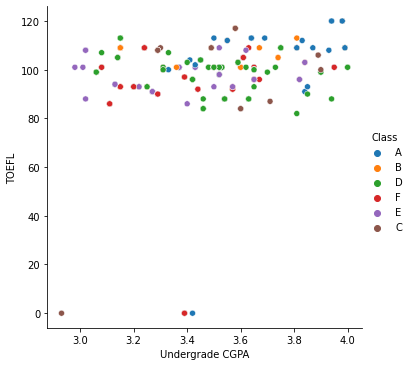

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="TOEFL", hue="Class")

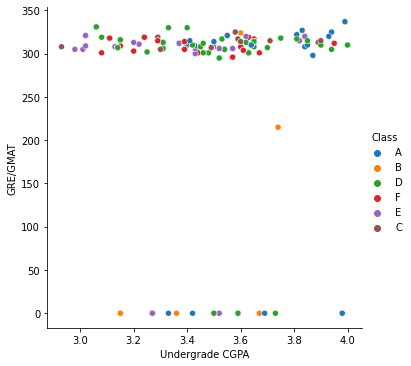

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="GRE/GMAT", hue="Class")

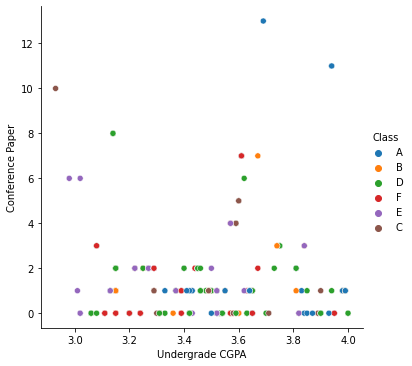

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="Conference Paper", hue="Class")

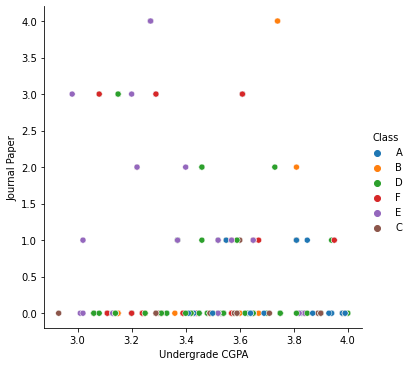

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="Journal Paper", hue="Class")

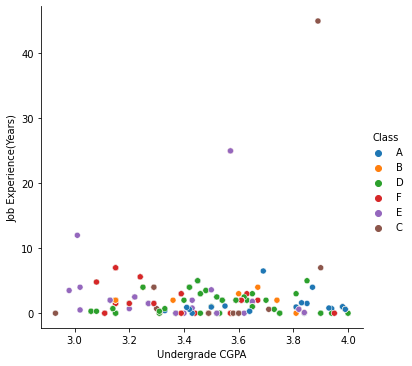

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="Job Experience(Years)", hue="Class")

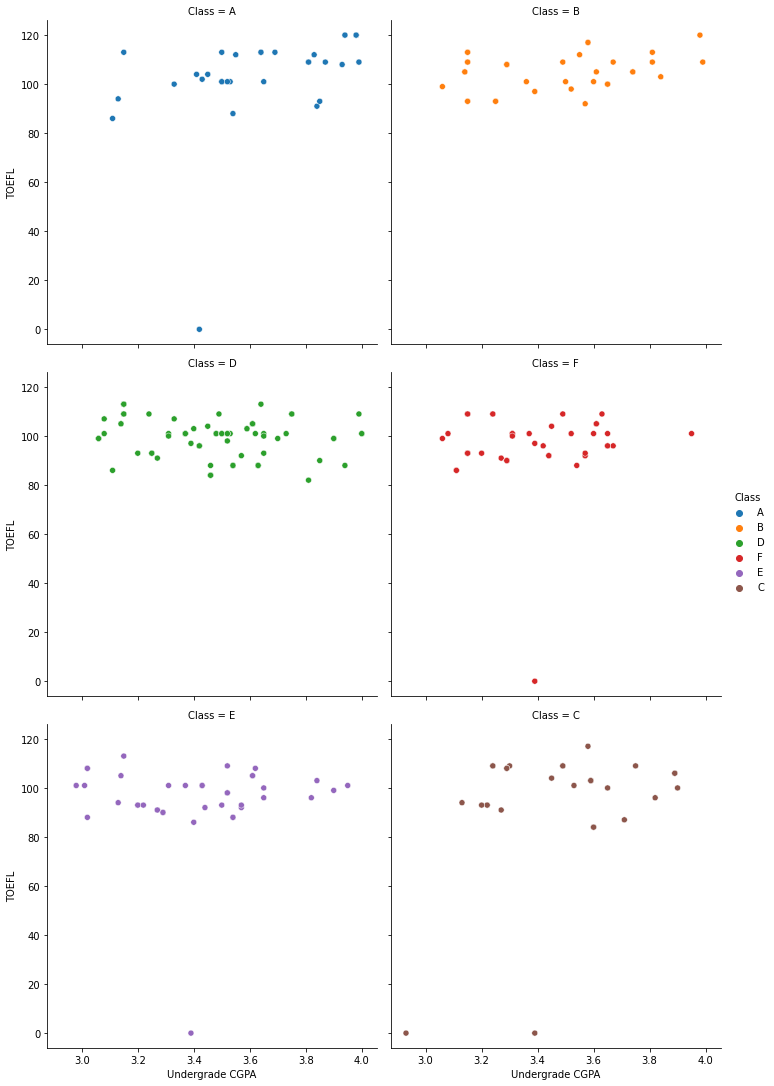

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="TOEFL", hue="Class", col="Class", col_wrap=2)

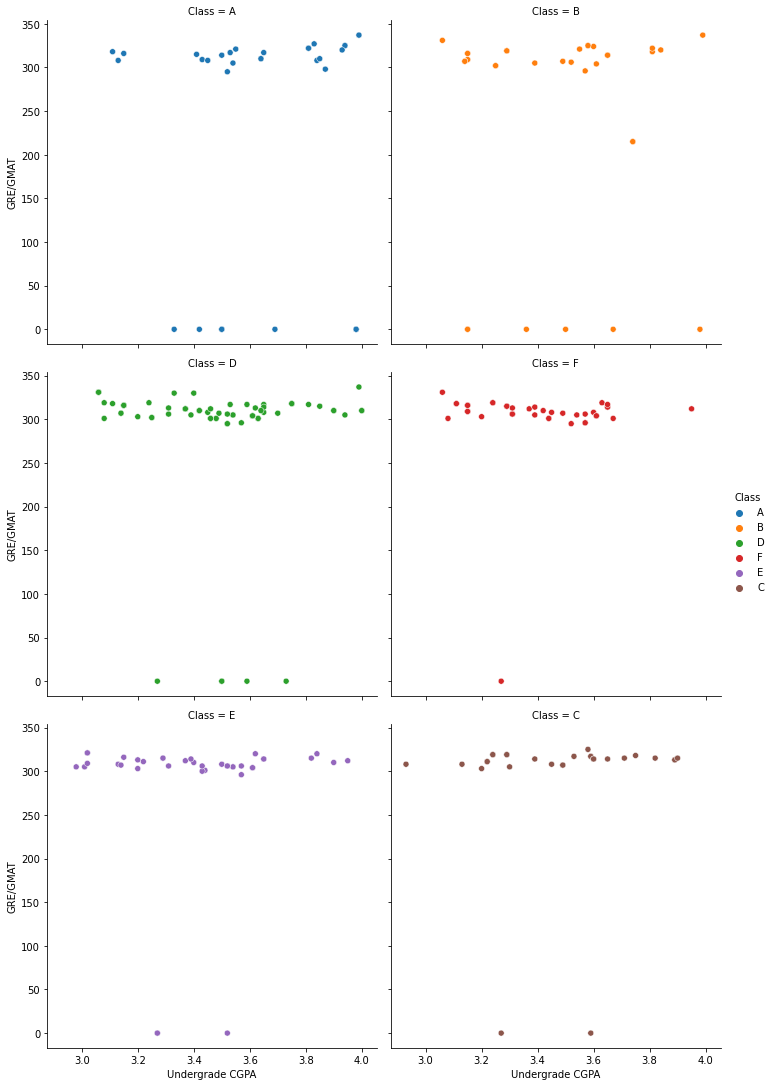

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="GRE/GMAT", hue="Class", col="Class", col_wrap=2)

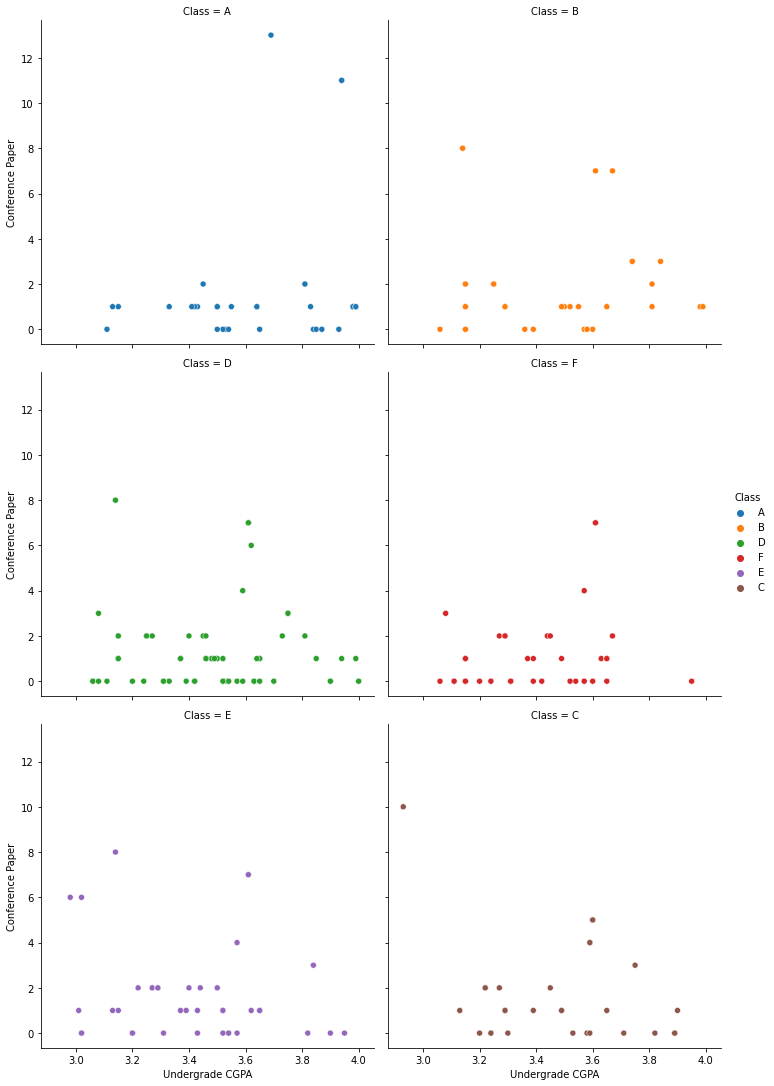

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="Conference Paper", hue="Class", col="Class", col_wrap=2)

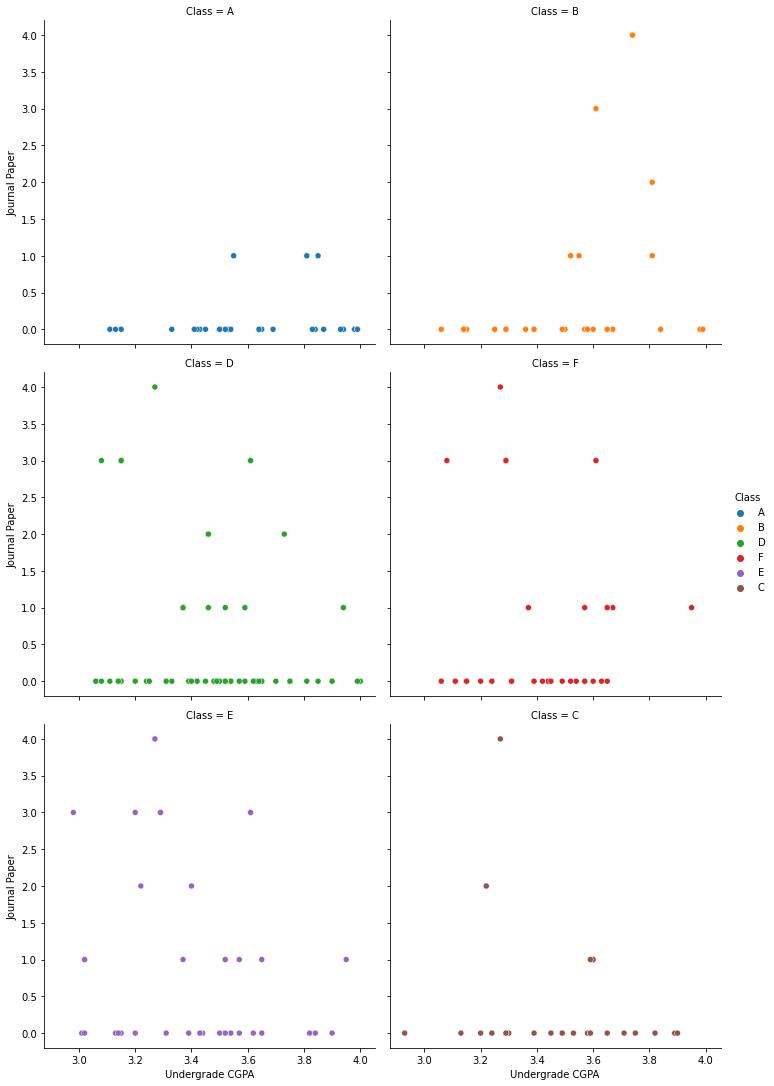

In [ ]:
sns.relplot(data=df, x="Undergrade CGPA", y="Journal Paper", hue="Class", col="Class", col_wrap=2)

In [ ]:
del df['Undergrade University']   
del df['Undergrade Department']   

In [ ]:
df.head()

,Undergrade CGPA,TOEFL,GRE/GMAT,Conference Paper,Journal Paper,Job Experience(Years),Class
0,3.98,120,0,1,0,1.0,A
1,3.98,120,0,1,0,1.0,A
2,3.98,120,0,1,0,1.0,A
3,3.98,120,0,1,0,1.0,B
4,3.98,120,0,1,0,1.0,A


Regression Plot

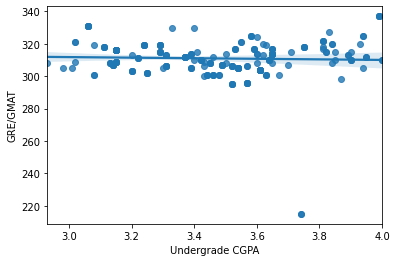

In [ ]:
df_gre = df[df["GRE/GMAT"]>1 ]
sns.regplot(data=df_gre, x="Undergrade CGPA", y="GRE/GMAT")

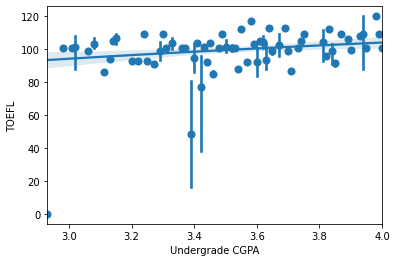

In [ ]:
ax = sns.regplot(x="Undergrade CGPA", y="TOEFL", data=df,
                 x_estimator=np.mean, logx=True)

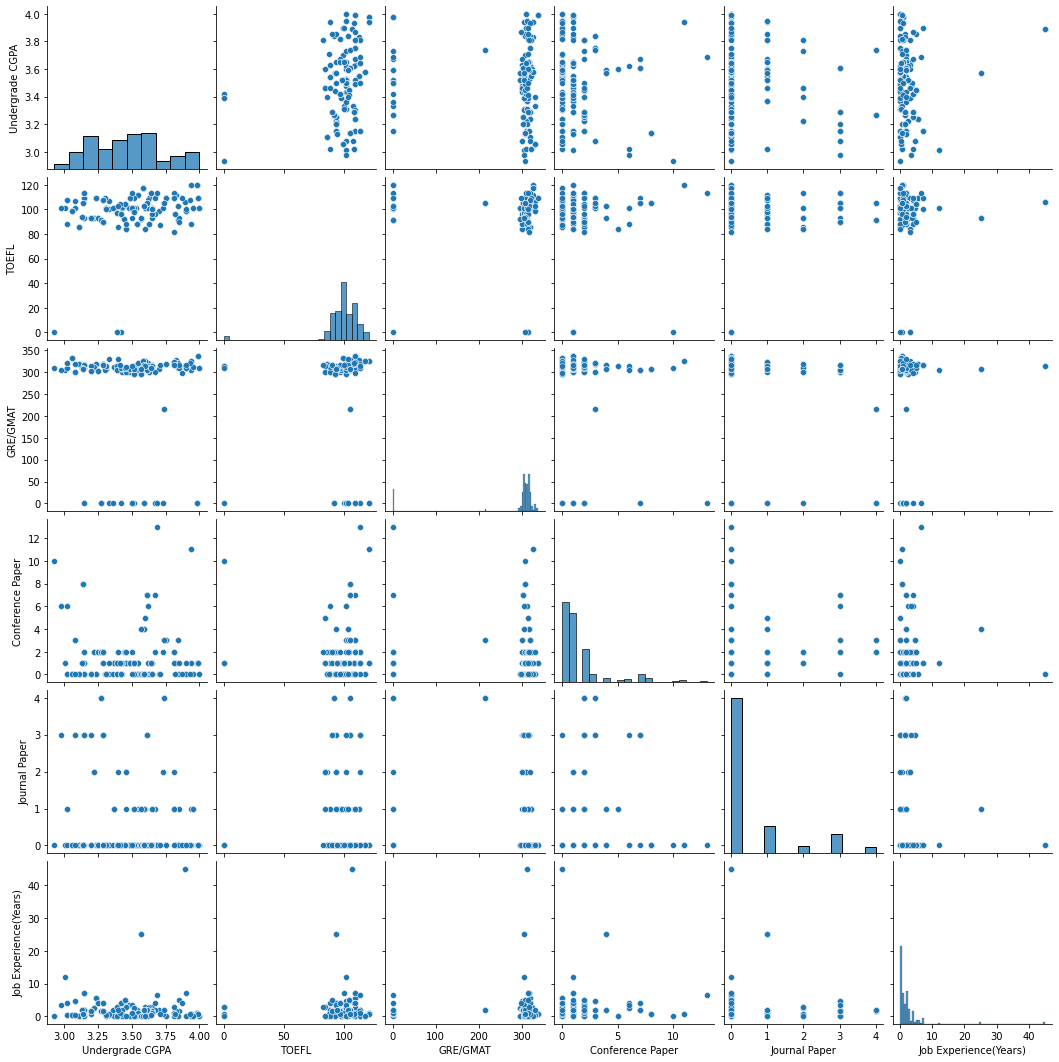

In [ ]:
sns.pairplot(df)

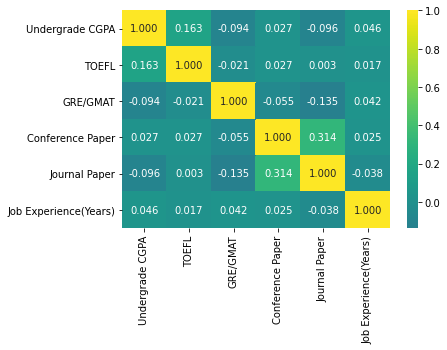

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'viridis', center = 0)
plt.show()

In [ ]:
data = df.iloc[:,1:].values
labels = df['Class'].values

In [ ]:
#on Hot Encoding
data1 = pd.get_dummies(data = df)
data1.head()

,Undergrade CGPA,TOEFL,GRE/GMAT,Conference Paper,Journal Paper,Job Experience(Years),Class_A,Class_B,Class_C,Class_D,Class_E,Class_F
0,3.98,120,0,1,0,1.0,1,0,0,0,0,0
1,3.98,120,0,1,0,1.0,1,0,0,0,0,0
2,3.98,120,0,1,0,1.0,1,0,0,0,0,0
3,3.98,120,0,1,0,1.0,0,1,0,0,0,0
4,3.98,120,0,1,0,1.0,1,0,0,0,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data1, labels, shuffle=True, train_size = 0.75)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(197, 12) (66, 12) (197,) (66,)


In [ ]:
model = SVC(probability=True)
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
preds = model.predict(x_test)

In [ ]:
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)

F1-score% = 9.740259740259742 | Accuracy% = 27.27272727272727


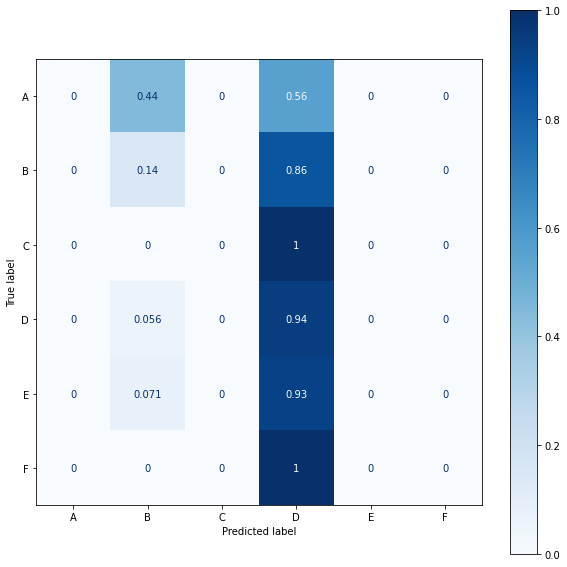

In [ ]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, preds, labels=df['Class'].unique())

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,preds)
print(cf_matrix)

[[ 0  4  0  5  0  0]
 [ 0  1  0  6  0  0]
 [ 0  0  0  4  0  0]
 [ 0  1  0 17  0  0]
 [ 0  1  0 13  0  0]
 [ 0  0  0 14  0  0]]


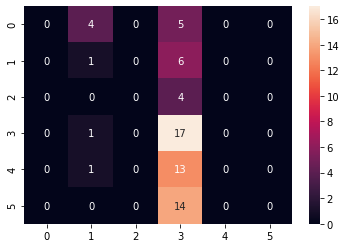

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

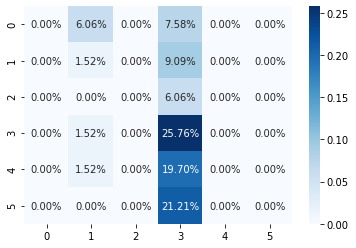

In [ ]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

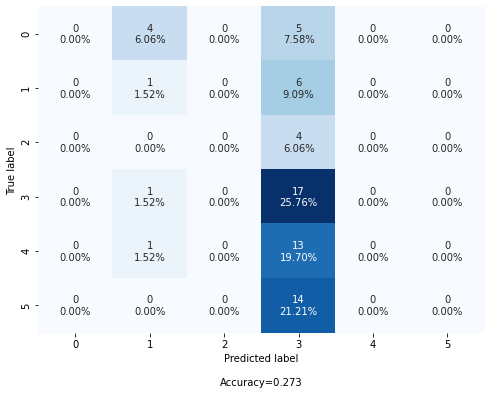

In [ ]:
make_confusion_matrix(cf_matrix, figsize=(8,6), cbar=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
  

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)